# Chute libre

Dans ce notebook, nous calculons la solution approchée du problème de la chute libre par la méthode d'Euler explicite et nous étudions sa qualité.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

g = 9.80665  # constante gravitationnelle sur Terre
h0 = 4.      # hauteur initiale
T = 1.       # temps final pour la simulation

## Calcul et tracé des solutions exactes et approchées

#### Question

> * Complétez la fonction `solution_exacte` qui prend en argument deux doubles `h0` et `t` et qui retourne la solution exacte à l'instant `t` lorsque la donnée initiale vaut `h0`.
* Modifiez cette fonction (ou pas si elle répond déjà à la question !) afin que la variable `t` puisse être à la fois un double et un ndarray. Dans le cas où `t` est un ndarray, la fonction devra retourner un ndarray correspondant à toutes les valeurs de la solution à chaque instant.
* Modifiez encore la fonction pour empécher la solution d'être négative (ce qui correspondrait à continuer à tomber après avoir touché le sol). Vous pourrez utiliser la fonction `np.maximum`.

*Remarquez la présence de la description de la fonction juste en dessous de sa déclaration à l'aide des """. C'est une excellente habitude que vous devrez scrupuleusement respecter dans tous vos codes python.* 

In [2]:
def solution_exacte(h0, t):
    """
    solution exacte de la chute libre

    Parameters
    ----------

    h0: double
        hauteur initiale
    t: double ou ndarray
        instants où la solution doit être retournée

    Returns
    -------

    double ou ndarray
    """
    return np.maximum(-0.5*g*(np.power(t,2)) +h0 , 0 )

In [3]:
solution_exacte(h0,[0,0.25,0.5,0.75,1])

array([4.        , 3.69354219, 2.77416875, 1.24187969, 0.        ])

In [4]:
help(solution_exacte)

Help on function solution_exacte in module __main__:

solution_exacte(h0, t)
    solution exacte de la chute libre
    
    Parameters
    ----------
    
    h0: double
        hauteur initiale
    t: double ou ndarray
        instants où la solution doit être retournée
    
    Returns
    -------
    
    double ou ndarray



#### Question

> Vérifiez que la solution exacte lorsque $h_0=4$ vaut bien 2.7741687500000003 à $t=0.5$ et 0 à $t=1$.

*Remarquez l'utilisation des fstring comme argument de la fonction `print`. Cette nouveauté est bien pratique pour afficher des valeurs de variables dans un calcul.*

In [5]:
for t in [0, 0.5, 1]:
    print(f'h({t:3.1f}) = {solution_exacte(h0, t):18.16f}')

h(0.0) = 4.0000000000000000
h(0.5) = 2.7741687500000003
h(1.0) = 0.0000000000000000


#### Question

> * Complétez la fonction `solution_ee` qui prend trois doubles en argument `h0`, `t` et `dt` et qui retourne un double pour la valeur de la solution approchée par la méthode d'Euler explicite à l'instant `t`. Vous construirez pour cela les trois suites $(t_k)$, $(v_k)$ et $(w_k)$ par les formules suivantes :
  * $t_0=0$, $v_0=h_0$ et $w_0=0$,
  * pour $k\geq0$, on pose $s=\min(dt, t-t_k)$ puis
    $$ \left\lbrace \begin{aligned}
    t_{k+1} &= t_k + s,\\
    v_{k+1} &= v_k + w_k\, s,\\
    w_{k+1} &= w_k - g \,s.
    \end{aligned}\right.$$
* Modifiez votre fonction afin qu'elle accepte que la variable `t` soit un ndarray et qui retourne la solution approchée pour toutes les valeurs du vecteur `t`. Vous pourrez supposer (ou imposer) que `t` soit un objet de dimension 1, que les valeurs de `t` soient rangées dans l'ordre croissant. Puis vous pourrez laisser à l'utilisateur plus de liberté...

In [6]:
solution_ee(h0, 0.5 , dt)

NameError: name 'solution_ee' is not defined

In [7]:
def solution_ee(h0, t, dt):
    """
    solution approchée de la chute libre
    par la méthode d'Euler explicite

    Parameters
    ----------

    h0: double
        hauteur initiale
    t: double ou ndarray
        instants où la solution doit être retournée
    dt: double
        pas de temps pour la méthode numérique

    Returns
    -------

    double ou ndarray
    """
    
    tk = 0
    vk = 0
    wk = 0
    
    count = 0
    while count <= t:
        s = min(dt, t-tk)
        
        tk += s
        vk += wk*s
        wk += -g*s
        
        count+=dt
    
    return h0+vk

In [8]:
def solution_ee_opt(h0, t, dt):
    """
    VERSION 2.0
    solution approchée de la chute libre
    par la méthode d'Euler explicite

    Parameters
    ----------

    h0: double
        hauteur initiale
    t: double ou ndarray
        instants où la solution doit être retournée
    dt: double
        pas de temps pour la méthode numérique

    Returns
    -------

    double ou ndarray
    """
    
    if np.isscalar(t): 
        print("is a scalar")
        t_tab = np.array([t])
    else :
        print("is NOT a scalar")

        t_tab = np.array(t)
        t_tab = np.sort(t_tab)
    
    
    res = np.zeros(t_tab.size)
    
    counter = 0
    tk = 0
    vk = 0
    wk = 0
    
    for n in np.arange(0,t_tab.size):
        r1 = t_tab[n]
        while counter< r1 :
            
            s = min(dt, r1-tk)
            tk += s
            vk += wk*s
            wk += -g*s

            counter+=dt
            
        res[n] = h0 + vk
    res1 = np.maximum(res[:], 0.)
    print(res1)
    return res1[0] if np.isscalar(t) else res1

#### Question

> Vérifiez à l'aide de la cellule suivante que le résultat de votre fonction est correct. Vous devez trouver
```
h(0.0) = 4.0000000000000000 ~ 4.0000000000000000
h(0.5) = 2.7741687500000003 ~ 2.7986853750000011
h(1.0) = 0.0000000000000000 ~ 0.0000000000000000
```
aux erreurs d'arrondi près...

In [9]:
dt = 1.e-2
for t in [0, 0.5, 1]:
    print(f'h({t:3.1f}) = {solution_exacte(h0, t):18.16f} ~ {solution_ee_opt(h0, t, dt):18.16f}')

is a scalar
[4.]
h(0.0) = 4.0000000000000000 ~ 4.0000000000000000
is a scalar
[2.79868538]
h(0.5) = 2.7741687500000003 ~ 2.7986853750000016
is a scalar
[0.]
h(1.0) = 0.0000000000000000 ~ 0.0000000000000000


#### Question

> Complétez la fonction `plot_position` qui prend en argument un double `dt` et qui trace la solution exacte ainsi que la solution approchée par la méthode d'Euler explicite de pas $\Delta t= dt$ entre les instants $t=0$ et $t=T$.

*Vous pourrez essayer d'obtenir une courbe qui ressemble à celle-ci en ajoutant un titre, des labels aux axes, une légende...*

![Position du point matériel](chute_libre_position.pdf)

In [10]:
def plot_position(dt):
    """ trace la position en fonction du temps """
    vt_e = np.linspace(0, T, 1025)
    vh_e = solution_exacte(h0, vt_e)

    vt_a = np.linspace(0, T, 17)
    vh_a = solution_ee_opt(h0, vt_a, dt)

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    
    ax.plot(vt_e, vh_e, label='exact')
    ax.scatter(vt_a, vh_a, label='euler explicit')
    ax.set_title('Position du point matériel')
    ax.set_xlabel(f'$t$')
    ax.set_ylabel(f'$h(t)$')
    ax.legend()

is NOT a scalar
[4.         3.98381903 3.93233412 3.84554526 3.72345247 3.53639062
 3.33780596 3.10391736 2.83472481 2.47604659 2.13036218 1.74937383
 1.33308153 0.80278693 0.31000277 0.         0.        ]


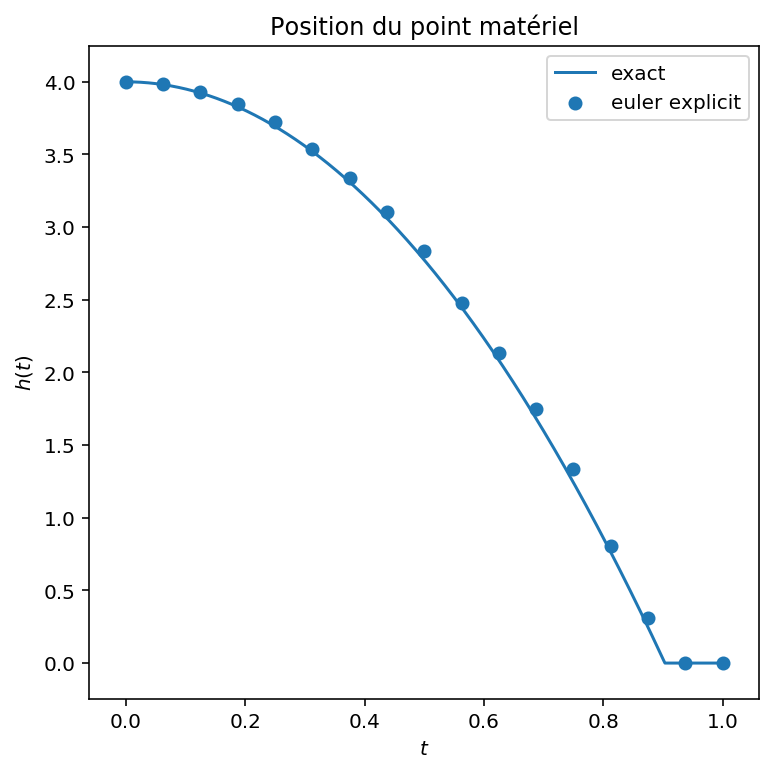

In [11]:
plot_position(1.e-2)
plt.savefig('chute_libre_position.pdf')

## Evaluation de l'erreur

Dans cette partie, nous cherchons à évaluer l'erreur commise par le schéma d'Euler explicite lorsque le pas de temps $\Delta t$ tend vers 0. Nous essayons en particulier de visualiser la propriété de convergence obtenue dans le TD.

#### Question

> Complétez la fonction `plot_erreur` qui trace l'erreur en échelle logarithmique entre la solution exacte et la solution approchée pour différentes valeurs du pas de temps $\Delta t$. Vous prendrez $\Delta t=2^{-k}$ pour $k\in\lbrace 2, \ldots, 9\rbrace$ et vous calculerez l'erreur à l'instant $t=0.5$.

*Vous pourrez essayer d'obtenir une courbe qui ressemble à celle-ci en ajoutant un titre, des labels aux axes, une légende...*

![Position du point matériel](chute_libre_erreur.pdf)

In [12]:
def plot_erreur():
    """ trace l'erreur à l'instant t=0.5 en fonction du pas de temps """
    
    Tf = 0.5
    he = solution_exacte(h0, Tf) # solution exacte
    
    val_dt = [2**-k for k in range(2,10)]
    res = [abs(solution_ee_opt(h0, Tf, p_t) -he) for p_t in val_dt]
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.plot(val_dt, val_dt, label="droite de pente 1")
    ax.scatter(val_dt, res, label='euler explicit')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f"Erreur à l'instant $t={Tf}$")
    ax.set_xlabel(f'$\Delta t$')
    ax.set_ylabel(f'erreur')
    ax.legend()

is a scalar
[3.38708438]
is a scalar
[3.08062656]
is a scalar
[2.92739766]
is a scalar
[2.8507832]
is a scalar
[2.81247598]
is a scalar
[2.79332236]
is a scalar
[2.78374556]
is a scalar
[2.77895715]


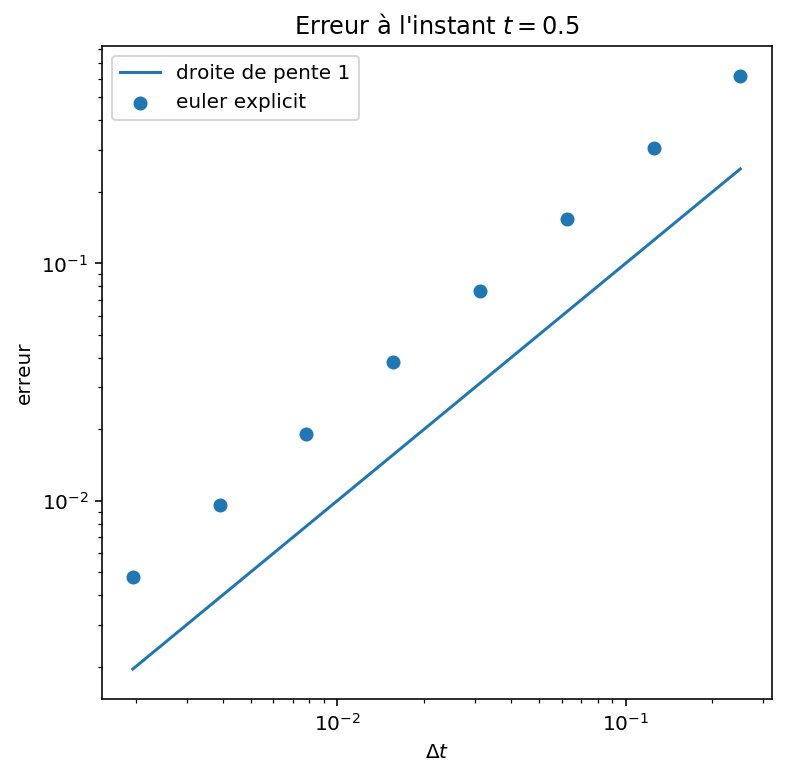

In [13]:
plot_erreur()

## Estimation de la durée de la chute

Nous allons à présent calculer numériquement le temps de chute et comparer avec le temps exact.

#### Question

> * Complétez la fonction `impact_exact` qui prend en argument un double `h0` et qui retourne le temps $t_f$ pour lequel la solution exacte vaut $0$, c'est-à-dire qui calcule la durée de la chute. Ce temps est donné par la formule $$ t_f = \sqrt\frac{2h_0}{g}.$$
* Modifiez (si c'est nécessaire) votre fonction afin que l'argument `h0` puisse être un double ou un ndarray.

In [14]:
def impact_exact(h0):
    """
    instant de l'impact

    Parameters
    ----------

    h0: double ou ndarray
        hauteur initiale

    Returns
    -------

    double ou ndarray
    """
    return np.sqrt((2*h0)/g)

#### Question

> Complétez la fonction `impact_ee` qui prend deux doubles en argument `h0` et `dt` et qui retourne l'estimation de la durée de chute donnée par la méthode d'Euler explicite. Vous utiliserez l'algorithme suivant :
  * vous calculez les trois suites $(t_k)$, $(v_k)$ et $(w_k)$ par la méthode d'Euler explicite ;
  * vous vous arrêtez au premier indice $k$ tel que $v_k<0$, cet indice sera noté $k$ ;
  * vous retournerez
  $$ t_f = \frac{t_{k-1}v_k - t_kv_{k-1}}{v_k - v_{k-1}},$$
  qui approche de manière linéaire la courbe de la solution numérique.
  
*Vous devrez faire attention à traiter de manière particulière le point correspondant à $h_0=0$. En effet, on s'attend à avoir dans ce cas $t_f=0$, ce qui n'est pas forcément le cas selon l'algorithme que vous allez écrire.*

In [38]:
def impact_ee(h0, dt):
    """
    instant de l'impact calculé numériquement
    par la méthode d'Euler explicite

    Parameters
    ----------

    h0: double ou ndarray
        hauteur initiale
    dt: double
        pas de temps pour la méthode numérique

    Returns
    -------

    double ou ndarray
    """

    def f(t, u):
        return np.array(
            [u[1], -g]
        )
    
    
    u = np.array([h0,0], dtype=(float))
    t1,v1 = 0,0
    
    counter = 0
    
    
    if u[0] == 0:
        return 0

    while u[0] > 0:
        
        t1 = counter
        v1 = u[0]
        u += dt*f(counter,u)
        counter += dt
        
        
    
    return (t1*u[0] - counter*v1)/(u[0]-v1)

#### Question

> Excécutez les deux cellules suivantes qui trace la durée de la chute (exacte et approchée) ainsi que l'erreur numérique commise. Vous devez trouver une image comme celle-ci :

![durée de la chute](chute_libre_duree.pdf)

In [39]:
def plot_dureechute(dt):
    """ trace la durée de la chute en fonction de la hauteur initiale """
    vh_e = np.linspace(0, 2, 1025)
    vtf_e = impact_exact(vh_e)

    vh_a = np.linspace(0, 2, 257)
    vtf_a = np.array([
        impact_ee(hk, dt) for hk in vh_a
    ])

    fig = plt.figure(figsize=(12, 6))
    
    ax1 = fig.add_subplot(121)
    ax1.plot(vh_e, vtf_e, label='exact')
    ax1.scatter(vh_a, vtf_a, label='euler explicit')
    ax1.set_title('Durée de la chute')
    ax1.set_xlabel(f'$h_0$')
    ax1.set_ylabel(f'$t_f$')
    ax1.legend()
    
    verr = abs(vtf_a - impact_exact(vh_a))
    ax2 = fig.add_subplot(122)
    ax2.scatter(vh_a, verr)
    ax2.set_title('Erreur dans la durée de la chute')
    ax2.set_xlabel(f'$h_0$')
    ax2.set_ylabel(f'$e$')

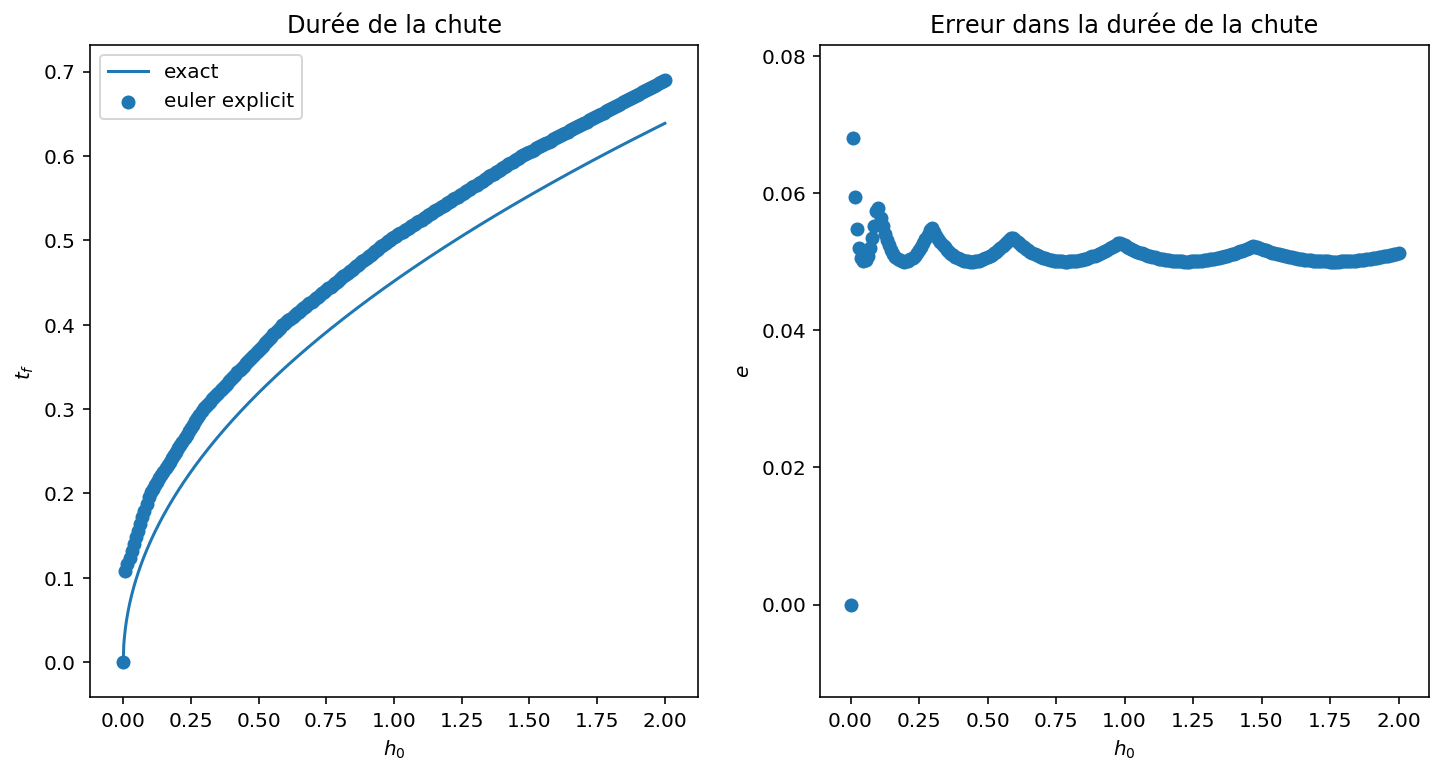

In [40]:
plot_dureechute(1.e-1)
plt.savefig('chute_libre_duree.pdf')